## **Task 2 - Prediction using Unsupervised ML**
#### Shashank Arun Sadafule
#### Data Science and Business Analytics Intern at SPARKS Foundation, Feb 2022
<br>
In this task, we train a clustering model using K-Means to predict the species of flower based on its features.
<br><br>
Following is the code that I've implemented.

### Importing Libraries

In [21]:
#importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
%matplotlib inline
print()

### Importing Data

In [22]:
data = pd.read_csv("Iris.csv")
data.head() #display the first 5 entries in the data set!

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


 ### Storing the Dataframe as Numpy array

In [23]:
X = np.asanyarray(data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm","PetalWidthCm"]])

### Correlation

In [34]:
#Adding extra numerical category corresponding to the species to find coorelation
data['Num Category'] = data['Species'].astype('category').cat.codes
data.corr(method='pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Num Category
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Num Category,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


We infer the following points:- <br><br>
1) There is a very high correlation between Petal Length, Petal Width and Category. <br>
2) Petal Length and Petal Width are highly correlated. <br>
3) Sepal Length and Category also seems to be correlated. But that would be because it is highly correlated to Petal Length and Petal Width which are directly correlated to Category.<br><br>


### Finding Optimum Numbers of Clusters
**Elbow Method** is used to find the optimum number of clusters.
We use **inertia_** attribute in K-means to find the sum of squared distance between the centroids and its assigned points and choose value of K for which the graph takes a sharp turn.

Text(0, 0.5, 'Inertia')

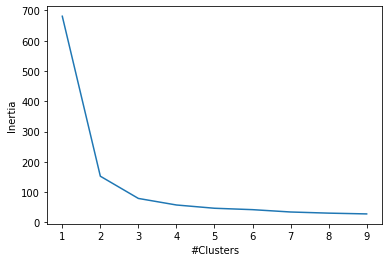

In [25]:
J =[]      #to store values of inertia

for i in range(1,10):
    model = KMeans(init="k-means++",n_clusters = i, n_init = 10)
    model.fit(X)
    J.append(model.inertia_)

plt.plot(range(1,10),J)
plt.xlabel('#Clusters')
plt.ylabel('Inertia')

We could see that the plot tapers off at **K = 3**, hence this is an optimum value for our model.

In [44]:
k=3
model = KMeans(init="k-means++", n_clusters = k, n_init=10)
model.fit(X)

KMeans(n_clusters=3)

### Accuracy 

In [46]:
y = model.predict(X)
Y_actual = np.asanyarray(data["Num Category"])
accuracy_score(y,Y_actual)

0.8933333333333333

### Visualization

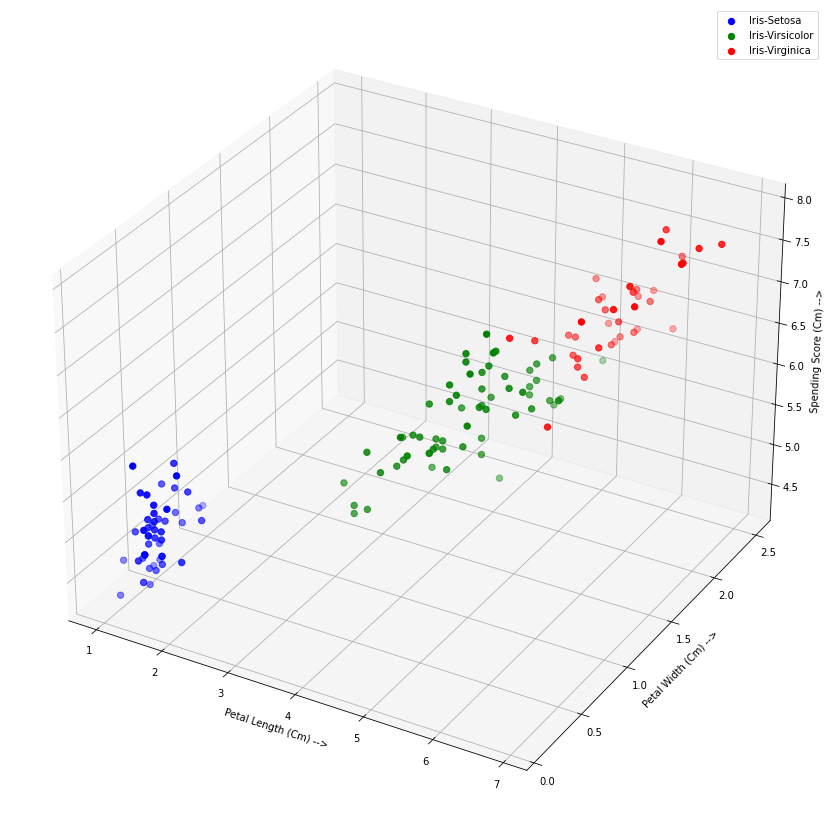

In [47]:
#3D plot!
y = model.predict(X)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

#We use features PetalLengthCm, PetalWidthCm, SepalLengthCm because they are highly correlated to species. 
ax.scatter(data['PetalLengthCm'][y == 0],data['PetalWidthCm'][y== 0],data['SepalLengthCm'][y== 0], s = 40 , color = 'blue', label = "Iris-Setosa")
ax.scatter(data['PetalLengthCm'][y == 1],data['PetalWidthCm'][y==1],data['SepalLengthCm'][y== 1], s = 40 , color = 'green', label = "Iris-Virsicolor")
ax.scatter(data['PetalLengthCm'][y == 2],data['PetalWidthCm'][y== 2],data['SepalLengthCm'][y== 2], s = 40 , color = 'red', label = "Iris-Virginica")

ax.set_xlabel('Petal Length (Cm) -->')
ax.set_ylabel('Petal Width (Cm) -->')
ax.set_zlabel('Spending Score (Cm) -->')

ax.legend()
plt.show()